## Simple Linear Regression_Ordinary Least Squares (OLS)


#### Q1 (2 points)  
In these exercises we'll be working with simple linear regression. Simple linear regression is an approach for predicting a response using only a single feature.

To create our model, we must “learn” or estimate the values of the regression coefficients $\hat{\beta}0$ and $\hat{\beta}1$. Once we’ve estimated these coefficients, we can use the model to predict responses. Here we are going to use the Least Squares technique as the cost function to estimate the coefficients.


In [1]:
import numpy as np 
def estimate_coef_OLS(X, y): 
    # x: np array of input with size n
    # y: np array of response/output with size n
    # return(B0, B1)
    ### YOUR CODE HERE ###
    # calculating regression coefficients(B0,B1)
    mean_X = np.mean(X);
    mean_y = np.mean(y);
    n = np.size(X);

    #Calculate B1
    sum_numer = 0 #numerator sum
    sum_denom = 0 #denominator sum
    for i in range(n):
        sum_numer += (y[i]-mean_y)*(X[i]-mean_X)
        sum_denom += (X[i]-mean_X)**2
    
    B1 = sum_numer/sum_denom
    
    #Calculate B0
    B0 = mean_y - B1*mean_X
   
    return(B0, B1) 


#### Q2 (4 points)  
Scikit-learn includes a number of dataset simulation functions, one of which is "make_regression ()". Importantly, we can create a dataset for regression that has both informative features and uninformative features, this makes for a good exercise in model selection.

In [2]:
import numpy as np 
from sklearn import linear_model, datasets
n_samples = 100
n_outliers = 5
X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=2)
# Add outlier data
np.random.seed(1)
X[:n_outliers] = 15 + 0.7 * np.random.normal(size=(n_outliers, 1))

 a) Plot the data (X and y)
 
 b) Use your code from the previous part to find the linear model for this dataset.

In [3]:
from matplotlib import pyplot as plt
### YOUR CODE HERE ###
# use scatter plot to represent the dataset
plt.scatter(X,y)
plt.axis([-4, 18, -180, 160])
plt.xlabel('x')
plt.ylabel('y')

# Plot the linear regression model that you found from Q1
B0, B1 = estimate_coef_OLS(X, y)
plt.plot(X, B0 + B1*X, '-')
plt.show()
print("B0 = "+ str(B0))
print("B1 = "+ str(B1))

<Figure size 640x480 with 1 Axes>

B0 = [-10.77769993]
B1 = [7.94665171]


c) Try to find the outliers in this dataset, 
Then remove the outliers and find a new linear model for the remained data(without outliers)

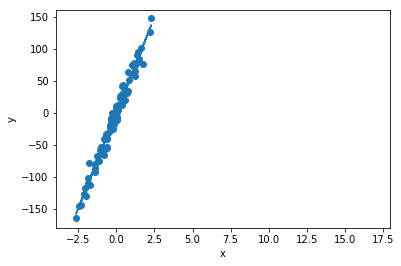

B0 = [0.28012253]
B1 = [59.71032114]


In [4]:
# Hint:you can use mean, variance or Z-score for each dimension to find outliers
from scipy import stats

#outliers appear to be the 5 data points with zscores above the x mean.
X_zscores = stats.zscore(X)
new_X = []
new_y = []
for i in range(np.size(X)):
    if X_zscores[i] < 1:
        new_X.append(X[i])
        new_y.append(y[i])

"""
X_zscores = np.sort(stats.zscore(new_X))
print("new_X size: " + str(np.size(new_X)))
print("new_y size: " + str(np.size(new_y)))
"""
"""
#there are 5 zscores in the y-dimension greater than 2
y_zscores = np.absolute(stats.zscore(y))
count = 0
new_y = []
for i in range(np.size(y_zscores)):
    if(y_zscores[i] > 2):
        count += 1
        print(y[i])
        print(y_zscores[i])
    else:
        new_y.append(y[i])
print(count)
print("y size = " + str(np.size(y)))
print("new_y size = " + str(np.size(new_y)))
"""

#trying out (a) with new_X, new_y:
plt.scatter(new_X,new_y)
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-4, 18, -180, 160])

# Plot with new model excluding outliers.
B0, B1 = estimate_coef_OLS(new_X, new_y)
plt.plot(new_X, B0 + B1*new_X, '-')
plt.show()
print("B0 = "+ str(B0))
print("B1 = "+ str(B1))

In [15]:
Y = [1,3,4,5,2,3,4]
X = range(1,8)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

array([2.14285714, 0.25      ])

d) Use Statsmodel and Scikit-learn (OLS) and compare the result with part (c).

In [18]:
### YOUR CODE HERE ###
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

newX = sm.add_constant(new_X)
model = sm.OLS(new_y, newX).fit()
print(model.summary())
#print('Parameters: ', results.params)
print(results.params)
"""
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(new_X,new_y)
reg.coef_
"""

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     3978.
Date:                Fri, 07 Feb 2020   Prob (F-statistic):           4.03e-78
Time:                        12:25:11   Log-Likelihood:                -347.48
No. Observations:                  95   AIC:                             699.0
Df Residuals:                      93   BIC:                             704.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2801      0.983      0.285      0.7

'\nfrom sklearn import linear_model\nreg = linear_model.LinearRegression()\nreg.fit(new_X,new_y)\nreg.coef_\n'

#### Q3 (4 points)
Kaggle is a competition platform for data scientists. In this class you will learn how to use the platform to practice data-science skills and "compete" with your classmates.

a) Reigster an account on [kaggle.com](https://www.kaggle.com) if you don't have one yet. Type in your kaggle profile name in the following block.

### What is your name on your Kaggle profile?
gracegupta

b) Use [this link](https://www.kaggle.com/t/58bf348e221f4a698c302663cd0e8f5e) to the competition page, and click on the top right button "Join Competition" to join the competition. The name of the competition is "Chapman CS530 Predicting Red Wine Quality". Copy the rules of the competition to the following block.

### What is the rule of the competition?
1. Download the training (train.csv) and testing set (test.csv) from the Data tab. We will talk much more about training and test sets in the course. Generally speaking, for the training set you have the information (the matrix X) and the labels (the vector y). But you do not have the labels for the test set. Here you have the wine rating for the training set but not the the test set. Therefore, your task is to fit a regression model based on the training set (where you are given the quality of the wine for each entry) and then predict as accuracy as possible on the quality of wines in the testing set, where you do not have the quality of the wine.

2. This competition is designed for the "Regression, Resampling and Regularization Module" and it is part of the homework assignments. Submission closes on Sunday at 11:59pm.

3. You are expected to submit your solutions to Kaggle and also your code on Canvas to get full credits.

c) Download the necessary datasets, read the data into a pandas dataframe and run any necessary data preprocessing techniques to allow further analysis.

In [115]:
### YOUR CODE for c) GOES HERE
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

filepath = '/Users/gracegupta/Downloads/train.csv'
train = pd.read_csv(filepath)
train.head()

df = pd.DataFrame(train)
#Sum of missing values in each column
df.isnull().sum()

Id                       0
fixed acidity           10
volatile acidity         0
citric acid              0
residual sugar           0
chlorides               10
free sulfur dioxide      0
total sulfur dioxide    10
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64

In [117]:
df.describe()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1119.000000,1109.000000,1119.000000,1119.000000,1119.000000,1109.000000,1119.000000,1109.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,559.000000,8.676736,0.550800,0.281832,2.619884,0.091142,16.413315,48.344454,1.036889,3.444227,0.681769,10.798198,5.852547
std,323.171781,5.670496,0.343354,0.291847,1.801195,0.068930,14.302557,48.281911,0.598978,1.971567,0.403720,5.745771,3.342237
min,0.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,279.500000,7.100000,0.400000,0.100000,1.900000,0.070000,7.000000,22.000000,0.995695,3.210000,0.550000,9.500000,5.000000
50%,559.000000,7.900000,0.520000,0.260000,2.200000,0.080000,14.000000,38.000000,0.996800,3.310000,0.620000,10.200000,6.000000
75%,838.500000,9.300000,0.640000,0.435000,2.600000,0.092000,22.000000,62.000000,0.997900,3.410000,0.730000,11.100000,6.000000
max,1118.000000,126.000000,5.800000,6.600000,26.000000,1.040000,300.000000,1050.000000,10.010000,33.600000,7.200000,98.000000,60.000000


In [120]:
df = df.drop(df[df.quality > 10].index)
df.describe()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1114.000000,1104.000000,1114.000000,1114.000000,1114.000000,1104.000000,1114.000000,1104.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000
mean,558.662478,8.327446,0.531548,0.270081,2.535592,0.087760,15.894524,46.425725,0.996778,3.312648,0.657451,10.420272,5.636445
std,323.780089,1.749430,0.180077,0.194668,1.281758,0.046592,10.336667,33.139474,0.001901,0.156329,0.166508,1.072694,0.807512
min,0.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,278.250000,7.100000,0.400000,0.092500,1.900000,0.070000,7.000000,22.000000,0.995683,3.210000,0.550000,9.500000,5.000000
50%,557.500000,7.900000,0.520000,0.260000,2.200000,0.080000,14.000000,38.000000,0.996775,3.310000,0.620000,10.150000,6.000000
75%,839.750000,9.200000,0.640000,0.430000,2.600000,0.091000,22.000000,61.000000,0.997900,3.410000,0.730000,11.100000,6.000000
max,1118.000000,15.900000,1.580000,1.000000,15.400000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [121]:
#preprocessing
df = df.fillna(df.mean())
df.isnull().sum()

Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [122]:
print(df['quality'].max())

8


In [124]:
high_quality = df.loc[df['quality']==8]
high_quality.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
51,51,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8
125,125,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
135,135,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
185,185,10.0,0.26,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8
277,277,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8


In [125]:
print("\nVolatile acidity:")
print(high_quality['volatile acidity'].mean())
print(high_quality['volatile acidity'].median())
print(high_quality['volatile acidity'].std())

print("\nSulphates:")
print(high_quality['sulphates'].mean())
print(high_quality['sulphates'].median())
print(high_quality['sulphates'].std())


Volatile acidity:
0.4269230769230769
0.38
0.1600200307974294

Sulphates:
0.7638461538461538
0.72
0.12829253430724005


In [142]:
low_quality = df.loc[df['quality']==4]
low_quality.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.0,4
17,17,5.6,0.62,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.1,4
20,20,6.7,1.04,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4
36,36,5.7,1.13,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
66,66,10.2,0.23,0.37,2.2,0.057,14.0,36.0,0.99614,3.23,0.49,9.3,4


In [143]:
print("\nVolatile acidity:")
print(low_quality['volatile acidity'].mean())
print(low_quality['volatile acidity'].median())
print(low_quality['volatile acidity'].std())

print("\nSulphates:")
print(low_quality['sulphates'].mean())
print(low_quality['sulphates'].median())
print(low_quality['sulphates'].std())


Volatile acidity:
0.7114473684210525
0.68
0.21953854520499458

Sulphates:
0.6057894736842107
0.55
0.2807868440260225


In [144]:
from scipy.stats import ttest_ind
ttest_ind(high_quality['volatile acidity'], low_quality['volatile acidity'])

Ttest_indResult(statistic=-4.287095709840819, pvalue=8.457972384078155e-05)

In [145]:
ttest_ind(high_quality['sulphates'], low_quality['sulphates'])

Ttest_indResult(statistic=1.951128045578157, pvalue=0.05677162685487756)

d) Choose one variable that you think might have the biggest effects on the quality of wine. Fit a single linear regression model to that variable using Statsmodel. Plot a scatter plot of the dependent variable over the independent variable and also plot the fitted line on the same plot to see how well your model fits. Also add the R<sup>2</sup> score as the title of the plot.

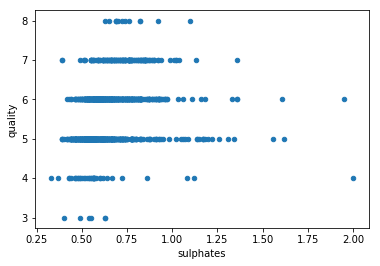

In [155]:
### YOUR CODE for d) GOES HERE
import statsmodels.api as sm
from matplotlib import pyplot as plt

X = df['sulphates']
y = df['quality']
model_sulphates = sm.OLS(y,X).fit()
df.plot.scatter('sulphates','quality')

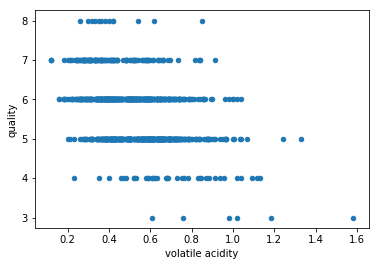

In [156]:
X = df['volatile acidity']
y = df['quality']
model_acidity = sm.OLS(y,X).fit()
df.plot.scatter('volatile acidity','quality')

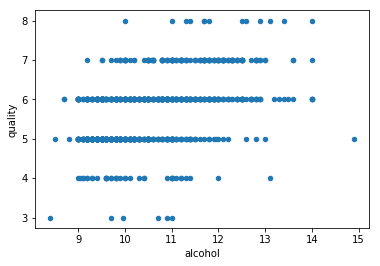

In [185]:
X = df['alcohol']
y = df['quality']
model_alcohol = sm.OLS(y,X).fit()
df.plot.scatter('alcohol','quality')

e) Make predictions on the testing set using your model created in d), create a submission and submit it to kaggle. 

In [171]:
### YOUR CODE for e) GOES HERE
filepath = '/Users/gracegupta/Downloads/test.csv'
test = pd.read_csv(filepath)
#test.head()
X = test['volatile acidity']
predictions = model_acidity.predict(X)
# Print out the statistics

#predictions.head()

sample_submission = pd.read_csv('/Users/gracegupta/Downloads/sample_submission.csv')
sample_submission.loc[:, 'Predicted'] = predictions
sample_submission.to_csv('gracegupta_submission.csv', header=True, index=False)
sample_submission.head()
model_acidity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     6118.
Date:                Fri, 07 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:18:10   Log-Likelihood:                -2476.1
No. Observations:                1114   AIC:                             4954.
Df Residuals:                    1113   BIC:                             4959.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
volatile acidity     9.3326      0.119     78.216      0.000       9.098       9.567
==============================================================================
Omnibus:                       77.650   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.966
Skew:                          -0.505   Prob(JB):                     1.34e-29
Kurtosis:                       4.359   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Report the score of your first submission on Kaggle here
39.70275

f) Try to fit the regression model using a different variable. Create another submission and submit it to kaggle. Discuss why that variable was better, worse, or roughly the same as the previous variable that you fit.

In [170]:
### YOUR CODE for f) GOES HERE
X = test['sulphates']
predictions = model_sulphates.predict(X)
predictions.head()

sample_submission2 = pd.read_csv('/Users/gracegupta/Downloads/sample_submission.csv')
sample_submission2.loc[:, 'Predicted'] = predictions
sample_submission2.to_csv('gracegupta_submission2.csv', header=True, index=False)
sample_submission2.head()
model_sulphates.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.667e+04
Date:                Fri, 07 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:17:57   Log-Likelihood:                -1974.9
No. Observations:                1114   AIC:                             3952.
Df Residuals:                    1113   BIC:                             3957.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sulphates      8.1288      0.063    129.102      0.000       8.005       8.252
==============================================================================
Omnibus:                      648.194   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8447.698
Skew:                          -2.429   Prob(JB):                         0.00
Kurtosis:                      15.586   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
X = test['alcohol']
predictions = model_alcohol.predict(X)

sample_submission3 = pd.read_csv('/Users/gracegupta/Downloads/sample_submission.csv')
sample_submission3.loc[:, 'Predicted'] = predictions
sample_submission3.to_csv('gracegupta_submission3.csv', header=True, index=False)
sample_submission3.head()

model_alcohol.summary()
#predictions.head()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 6.684e+04
Date:                Fri, 07 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:30:09   Log-Likelihood:                -1228.2
No. Observations:                1114   AIC:                             2458.
Df Residuals:                    1113   BIC:                             2463.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alcohol        0.5391      0.002    258.525      0.000       0.535       0.543
==============================================================================
Omnibus:                       52.591   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.490
Skew:                          -0.337   Prob(JB):                     6.77e-22
Kurtosis:                       4.283   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Report the score of your second submission on Kaggle here
36.16614 (sulphates)

In [12]:
### Discussion Goes Here